<a href="https://colab.research.google.com/github/mohdrab01/Machine-Learning-Lab-Tasks/blob/main/ML_Week4(ii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML - Week 4 - 19-04-2021
# 18071A0591

---


# **DIABETES DATASET - DECISION TREE CLASSIFIER**

---

## Import Statements

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
 
from sklearn import tree
 
%matplotlib inline

## 1. Get the dataset

In [ ]:
!wget https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv

--2021-04-19 10:30:20--  https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23875 (23K) [text/plain]
Saving to: ‘diabetes.csv.3’

diabetes.csv.3      100%[===================>]  23.32K  --.-KB/s    in 0.002s  

2021-04-19 10:30:20 (12.7 MB/s) - ‘diabetes.csv.3’ saved [23875/23875]



## 2. Show the data in dataset

In [ ]:
data = pd.read_csv('diabetes.csv.3')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Explore Dataset / EDA

In [ ]:
data.dtypes # Dataset column datatypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.shape # dataset shape/size

(768, 9)

In [ ]:
# Description about dataset
print(data.describe()) 

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


In [ ]:
# Check for missing/ Null values in the dataset
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# print the information about the dataset columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# print column names for the dataset 
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Check the LABELS and their COUNTS for Target Column 'OUTCOME'
data['Outcome'].value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# We know that the target column for this dataset is "OUTCOME"
# LET's seperate the Target column from original dataset
target_col = ['Outcome']

In [ ]:
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## 4. Splitting the Dataset


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the dataset in a ratio of 65% (train) : 35% (test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 42)

In [ ]:
x_train.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [ ]:
x_test.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [ ]:
y_train.dtypes

dtype('int64')

In [ ]:
y_test.dtypes

dtype('int64')

# 5. DECISION TREE CLASSIFICATION ALGO
## (based on GINI index and MAX_DEPTH = 3 ) 


---


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Applying Decision tree classification on x_train and y_train
# GINI Classifier = clf_gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicted y-values when GINI index is used
y_pred_gini = clf_gini.predict(x_test)
y_pred_gini

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0])

## 6. Classifier Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('With GINI index criterion\nDecision Tree Classifier Model Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

With GINI index criterion
Decision Tree Classifier Model Accuracy: 0.6952


## 7. Predict the "OUTCOME" Target label for X_train (Verifying)

In [ ]:
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

## 8. Check for FIT of classifier

In [ ]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

NameError: ignored

## 9(i). Tree - Representation of Decision Tree Model 

[Text(334.8, 380.52, 'X[1] <= 154.5\ngini = 0.461\nsamples = 499\nvalue = [319, 180]'),
 Text(167.4, 271.8, 'X[7] <= 30.5\ngini = 0.386\nsamples = 417\nvalue = [308, 109]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 127.5\ngini = 0.245\nsamples = 245\nvalue = [210, 35]'),
 Text(41.85, 54.360000000000014, 'gini = 0.157\nsamples = 198\nvalue = [181, 17]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.473\nsamples = 47\nvalue = [29, 18]'),
 Text(251.10000000000002, 163.07999999999998, 'X[5] <= 26.95\ngini = 0.49\nsamples = 172\nvalue = [98, 74]'),
 Text(209.25, 54.360000000000014, 'gini = 0.114\nsamples = 33\nvalue = [31, 2]'),
 Text(292.95, 54.360000000000014, 'gini = 0.499\nsamples = 139\nvalue = [67, 72]'),
 Text(502.20000000000005, 271.8, 'X[5] <= 28.7\ngini = 0.232\nsamples = 82\nvalue = [11, 71]'),
 Text(418.5, 163.07999999999998, 'X[5] <= 25.35\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [0

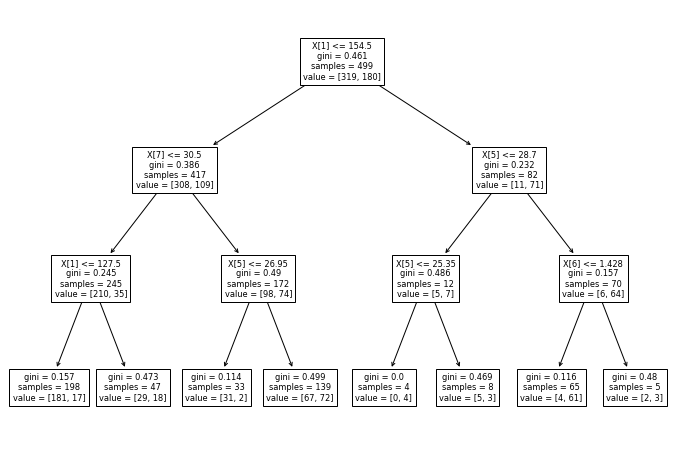

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train)) 

## 9(ii). Using export_graphviz to Visualize Trees

In [ ]:
import graphviz

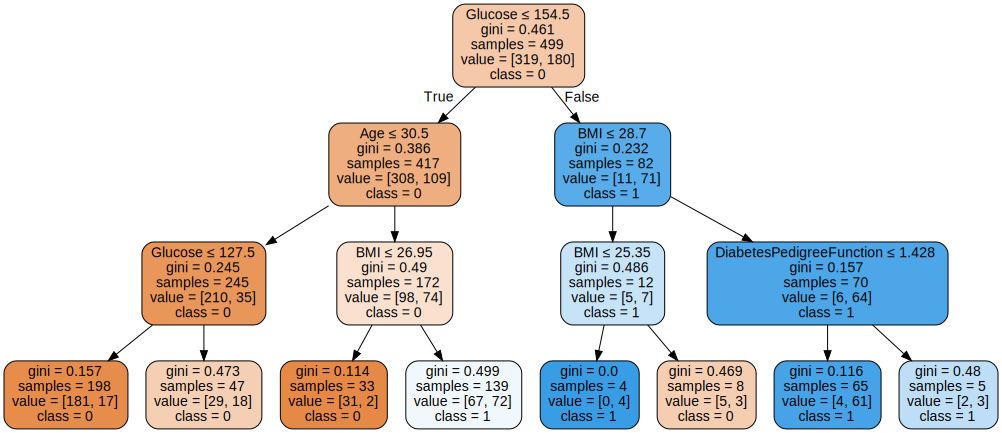

In [ ]:
dot_data = tree.export_graphviz(clf_gini.fit(x_train, y_train), 
                                out_file=None, 
                                feature_names=list(x.columns),  
                                class_names=['0','1'],  
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                                leaves_parallel=False
                                )  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

## 10. Using pydotplus to Visualize Trees

In [ ]:
import pydotplus
from IPython.display import Image

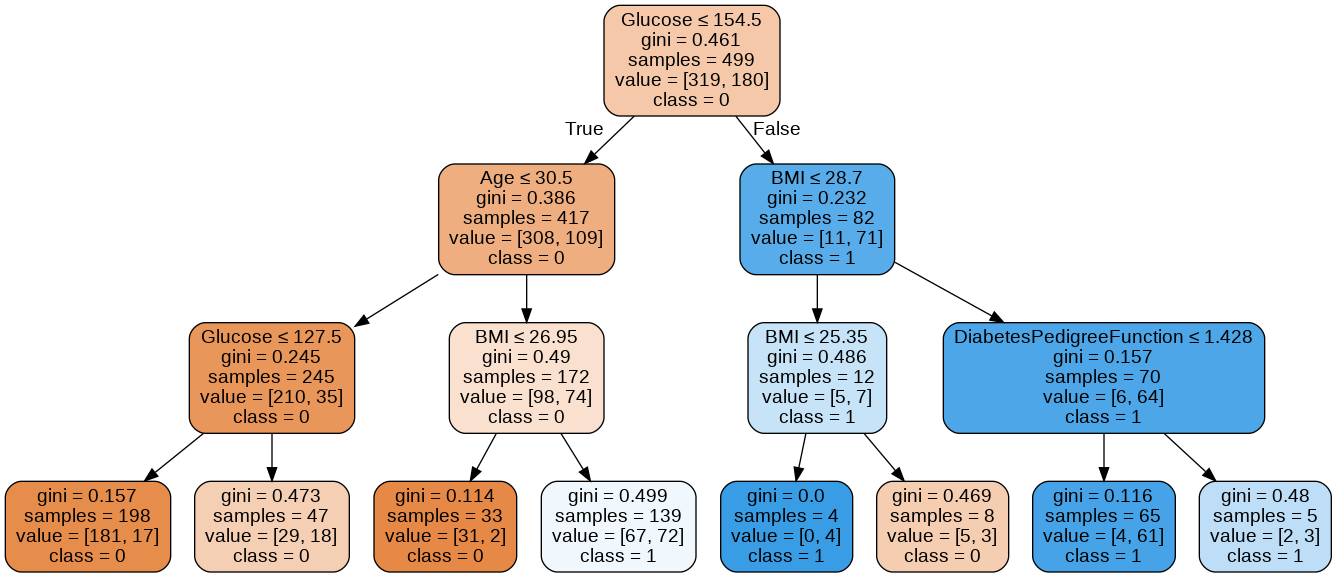

In [ ]:
graph = pydotplus.graphviz.graph_from_dot_file("diabetes.dot")
Image(graph.create_png())

## 11. Accuracy and Decision Trees of Model at Differnt Depths

Accuracy using Decision Trees max_depth  1 accuracy is 0.724907063197026
Accuracy using Decision Trees max_depth  2 accuracy is 0.724907063197026
Accuracy using Decision Trees max_depth  3 accuracy is 0.6951672862453532
Accuracy using Decision Trees max_depth  5 accuracy is 0.7657992565055762
Accuracy using Decision Trees max_depth  10 accuracy is 0.6951672862453532
Accuracy using Decision Trees max_depth  15 accuracy is 0.7174721189591078


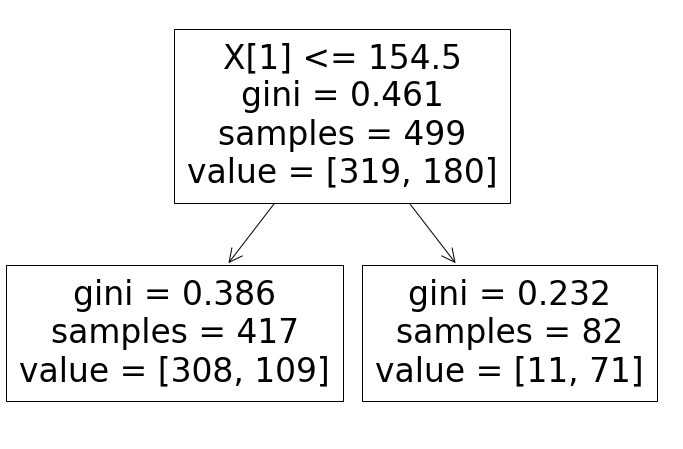

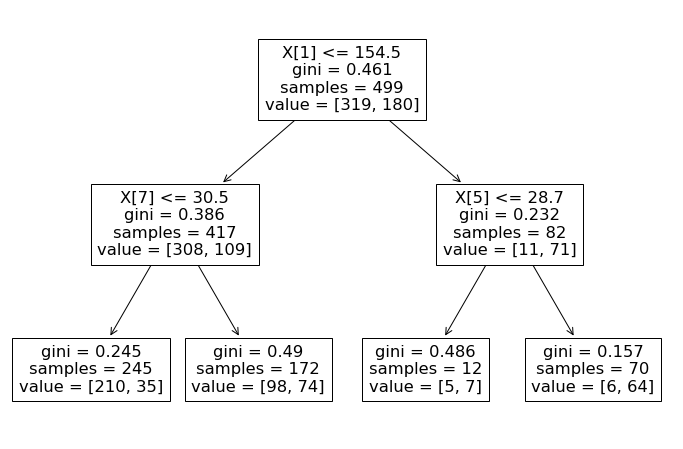

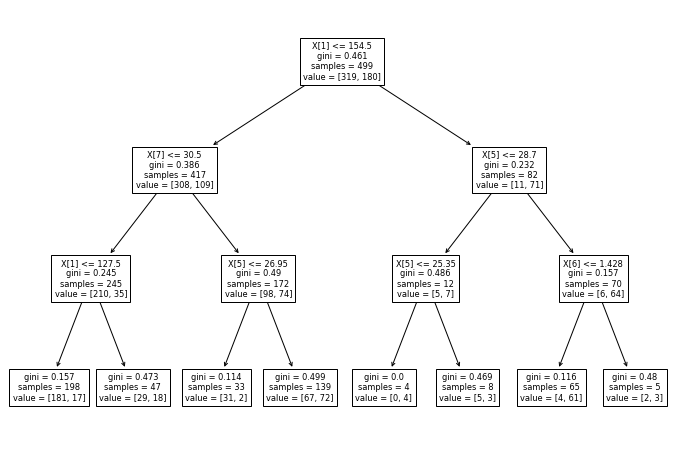

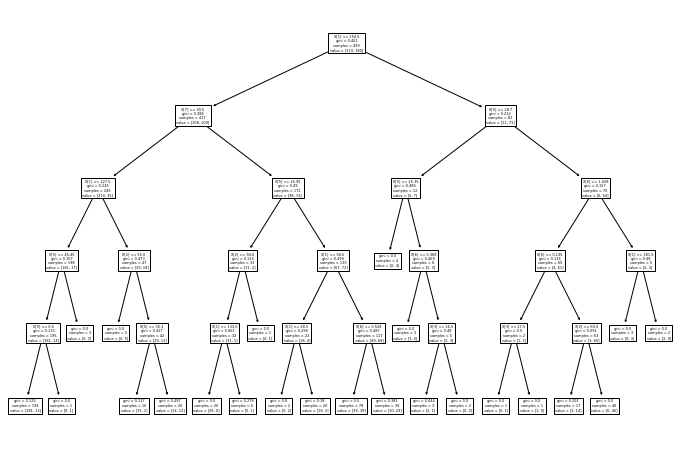

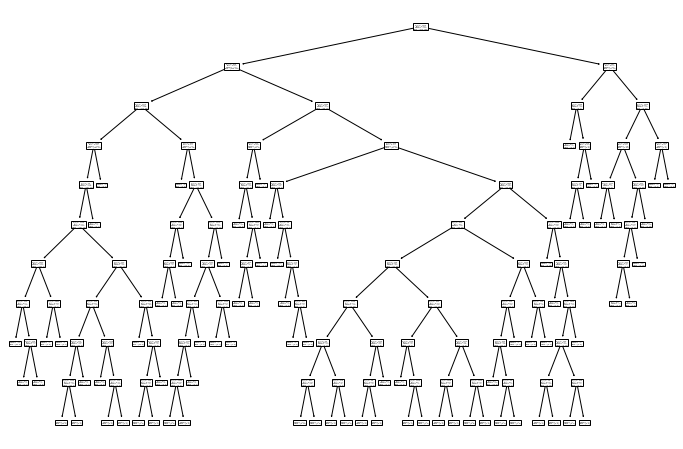

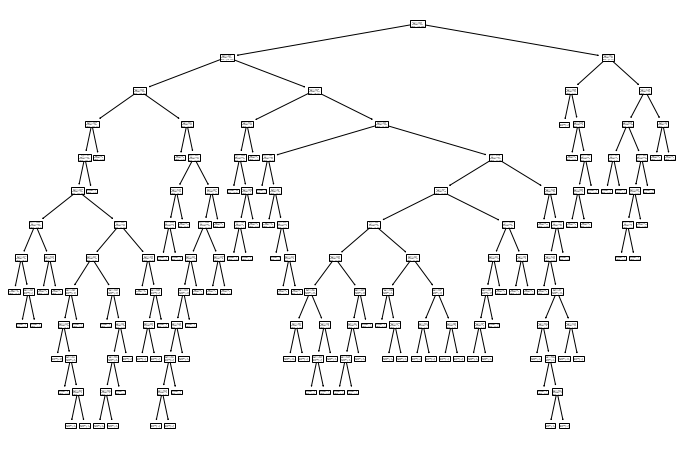

In [ ]:
for i in [1,2,3,5,10,15]:
  clf = DecisionTreeClassifier(max_depth=i)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  print("Accuracy using Decision Trees max_depth ",i,"accuracy is",accuracy_score(y_test,y_pred))
  plt.figure(figsize=(12,8))
  tree.plot_tree(clf.fit(x_train, y_train)) 
  # print("auc score",metrics.auc())